<a href="https://colab.research.google.com/github/JoseOsorioS/UTEC_Python/blob/main/Sesi%C3%B3n_6_%E2%80%93_Dashboard_Paso_a_Paso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![picture](https://drive.google.com/uc?export=view&id=1KaUW3_JAieeY7WVNfoRiTSr2JsaeAcXi)

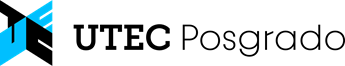


# Módulo 3 - Sesión 6
## Profesor: Germain Garcia Zanabria

**Paso a paso de la construcción de un Dashboard**


1.   Importar librerías
2.   Definimos la primera función del dashboard que será un gráfico de barras por género
3.   Creando la primera interacción
4.   Juntando todos los componentes en una sola fila
5.   Analizando los puntajes obtenidos por curso y por género
6.   Analizando la mediana y valores atípicos usando boxplots
7.   Dasboard Completo


In [ ]:
import pandas as pd
import ipywidgets
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/germaingarcia/Files_Lectures/main/data_Sesion6_python/exams.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,masculino,group A,high school,standard,completed,67,67,63
1,femenino,group D,some high school,free/reduced,none,40,59,55
2,masculino,group E,some college,free/reduced,none,59,60,50
3,masculino,group B,high school,standard,none,77,78,68
4,masculino,group E,associate's degree,standard,completed,78,73,68


## 1. Importamos las librerías

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, VBox, HBox
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Definimos la primera función del dashboard que será un gráfico de barras por género

Creamos una función llamada `plot_bar` que va a ser nuestro primer componente visual en el dashboard. Creando funciones facilita la inclusión y control de múltiples componentes visuales.



In [ ]:
# Función para crear el gráfico de barras
def plot_bar():
    plt.figure(figsize=(8, 4))
    sns.countplot(x='gender', data=df, palette='pastel', hue='gender')
    plt.title('Distribución de Género')
    plt.show()

# Convirtiendo el gráfico de plot bar en Widget
# Se crea un widget de salida llamado out_bar que captura la salida del gráfico de barras inicial.
# Esto permite mostrar el gráfico en un entorno interactivo como Colab
out_bar = widgets.Output()
with out_bar:
    plot_bar()

display( VBox([out_bar]) )

## 3. Creando la primera interacción

 Vamos a crear un **Drowpdown** para seleccionar entre los dos géneros del dataset y explorar sus características.


In [ ]:
# Crear el widget de selección de género
dropdown_gender = widgets.Dropdown(
    # Establecer las opciones del Dropdown como los valores únicos de la columna 'gender' del DataFrame 'df': femenino y masculino
    options=df['gender'].unique(),
    # Establecer el valor inicial del Dropdown como el primer valor único de la columna 'gender' del DataFrame 'df'
    value=df['gender'].unique()[0],
    # Establecer la descripción del Dropdown como 'Gender:'
    description='Genero:',
    # Habilitar el Dropdown
    disabled=False
)
#dropdown_gender = widgets.Dropdown( options=df['gender'].unique(),value=df['gender'].unique()[0],description='Gender:',disabled=False)
display(dropdown_gender)

Dropdown(description='Genero:', options=('masculino', 'femenino'), value='masculino')

### 3.1 Una vez elegida una opción del dropdown podemos mostrar un **char pie** (gráfico de pastel) que muestre una característica adicional. Escogimos la característica Raza/Etnia.

In [ ]:
# Función para crear el gráfico de pastel según el género seleccionado
def plot_pie(selected_gender):
    plt.figure(figsize=(8, 4))
    gender_df = df[df['gender'] == selected_gender]
    race_counts = gender_df['race/ethnicity'].value_counts()
    race_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.title(f'Distribución de raza/etnia para {selected_gender.capitalize()}')
    plt.ylabel('')  # Hide the y-label
    plt.show()

# Definiendo la primera interacción
# Widget interactivo para el gráfico de pastel
out_pie = widgets.interactive_output(plot_pie, {'selected_gender': dropdown_gender})  # Nota: esta funcion recibe dicho parámetro de esta forma plot_pie(dropdown_gender)

# Para organizar el dashboard definimos un vertical box donde el primer elemento
# es el dropbox de género, seguido por el gráfico de pastel
display(VBox([dropdown_gender, out_pie]) )

## 4. Juntando todos los componentes en una sola fila
Definimos un primer `HBox` que contenga secuencialmente los componentes que hemos creado.
El primer componente es el gráfico de barras de género.
Y el segundo componente es un vertical Box para permitir una organización espacial cómoda al usuario.

In [ ]:
# Mostrar los widgets y los gráficos en una fila
display(HBox([  out_bar,   VBox([dropdown_gender, out_pie])  ])  )

## 5. Analizando los puntajes obtenidos por curso y por género
Adicionaremos gráficos **Scatter Plot** para comparar los puntajes obtenidos de Matemática, Escritura y Lectura.
Debido a que compararemos pares de variables, generaremos 3 scatterplots con estos pares:

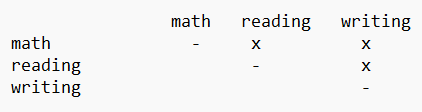



Primero definimos una función de scatter plot para mostrar la dispersión entre las variables `math score` y `reading score` de acuerdo a la selección de género del dropdown.

In [ ]:
# Función para crear el scatter plot según el género seleccionado
def plot_scatter_math_reading(selected_gender):
    plt.figure(figsize=(8, 4))
    gender_df = df[df['gender'] == selected_gender]
    sns.scatterplot(x='math score', y='reading score', data=gender_df, hue='race/ethnicity', palette='pastel')
    plt.title(f'Scatter Plot de Math Score vs Reading Score para género {selected_gender.capitalize()}')
    plt.show()

# Widget interactivo para el scatter plot math y reading
# Como este componente, al igual que el pie chart, depende de la interacción establecemos su función de interacción y el argumento que recibe del dropdown
out_scatter = widgets.interactive_output(plot_scatter_math_reading, {'selected_gender': dropdown_gender})

display(VBox([HBox([out_bar, VBox([dropdown_gender, out_pie])  ]),
              HBox([out_scatter  ])   ]) )

### 5.1 Comparando el resto de variables con Scatter Plot
Definimos el segundo y tercer gráfico para analizart la dispersión de los siguientes pares de variables:

*   Math y Writing
*   Reading y Writing




In [ ]:
# Función para crear el scatter plot según el género seleccionado
def plot_scatter_math_writing(selected_gender):
    plt.figure(figsize=(8, 4))
    gender_df = df[df['gender'] == selected_gender]
    sns.scatterplot(x='math score', y='writing score', data=gender_df, hue='race/ethnicity', palette='pastel')
    plt.title(f'Scatter Plot de Math Score vs Writing Score para {selected_gender.capitalize()}')
    plt.show()

# Función para crear el scatter plot según el género seleccionado
def plot_scatter_reading_writing(selected_gender):
    plt.figure(figsize=(8, 4))
    gender_df = df[df['gender'] == selected_gender]
    sns.scatterplot(x='reading score', y='writing score', data=gender_df, hue='race/ethnicity', palette='pastel')
    plt.title(f'Scatter Plot de Reading Score vs Writing Score para género {selected_gender.capitalize()}')
    plt.show()

# Añadimos las interacciones que tienen con el dropdown

# Widget interactivo para el scatter plot math y reading
out_scatter_mw = widgets.interactive_output(plot_scatter_math_writing, {'selected_gender': dropdown_gender})

# Widget interactivo para el scatter plot reading writing
out_scatter_rw = widgets.interactive_output(plot_scatter_reading_writing, {'selected_gender': dropdown_gender})

#Ploteamos el dashboard con los nuevos gráficos
display(VBox([HBox([out_bar, VBox([dropdown_gender, out_pie])  ]),
              HBox([out_scatter, out_scatter_mw  ]),
              HBox([out_scatter_rw ]) ]) )

## 6. Analizando la mediana y valores atípicos usando **boxplots**

Para este último componente vamos a usar **RadioButtons** que a diferencia de un CheckBox permiten una única selección entre los items.

Colocamos las tres opciones de puntajes que son:  `math score`, `reading score` y `writing score`.

In [ ]:
# Crear los radio buttons para seleccionar el tipo de puntuación
radio_score_type = widgets.RadioButtons(
    options=['math score', 'reading score', 'writing score'],
    value='math score',
    description='Puntaje:'
)

display(radio_score_type)

RadioButtons(description='Puntaje:', options=('math score', 'reading score', 'writing score'), value='math sco…

### 6.1 Definimos una función para el BoxPlot que recibe 2 parámetros (el género y el tipo de Puntaje)

La función `plot_box()` recibe dos parámetros en lugar de uno como las funciones anteriores que solo recibían el parámetro del dropdown.

La función `plot_box()` recibe dos parámetros: `selected_gender` y `selected_curso`. Estos parámetros representan el género seleccionado y el curso seleccionado, respectivamente. La función utiliza estos parámetros para filtrar los datos del DataFrame df y crear un box plot que muestra la distribución del curso seleccionado para el género seleccionado.

In [ ]:

# Función para crear el box plot según el género seleccionado
def plot_box(selected_gender, selected_curso):  # Recibe dos parámetros
    plt.figure(figsize=(8, 4))
    gender_df = df[df['gender'] == selected_gender]
    sns.boxplot(y=selected_curso, data=gender_df, palette='pastel', hue='race/ethnicity')
    plt.title(f'Box Plot de {selected_curso.capitalize()} para género {selected_gender.capitalize()}')
    plt.show()


# Widget interactivo para el box plot
out_box = widgets.interactive_output(plot_box, {'selected_gender': dropdown_gender, 'selected_curso': radio_score_type })

display( VBox( [radio_score_type, out_box ]))

### 7. Dashboard completo

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, VBox, HBox
import matplotlib.pyplot as plt
import seaborn as sns

# Función para crear el gráfico de barras
def plot_bar():
    plt.figure(figsize=(8, 4))
    sns.countplot(x='gender', data=df, palette='pastel', hue='gender')
    plt.title('Distribución de Género')
    plt.show()

# Función para crear el gráfico de pastel según el género seleccionado
def plot_pie(selected_gender):
    plt.figure(figsize=(8, 4))
    gender_df = df[df['gender'] == selected_gender]
    race_counts = gender_df['race/ethnicity'].value_counts()
    race_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.title(f'Distribución de raza/etnia para {selected_gender.capitalize()}')
    plt.ylabel('')  # Hide the y-label
    plt.show()

# Crear el widget de selección de género
dropdown_gender = widgets.Dropdown(
    options=df['gender'].unique(),
    value=df['gender'].unique()[0],
    description='Gender:',
    disabled=False
)

# Función para crear el scatter plot según el género seleccionado
def plot_scatter_math_reading(selected_gender):
    plt.figure(figsize=(8, 4))
    gender_df = df[df['gender'] == selected_gender]
    sns.scatterplot(x='math score', y='reading score', data=gender_df, hue='race/ethnicity', palette='pastel')
    plt.title(f'Scatter Plot de Math Score vs Reading Score para género {selected_gender.capitalize()}')
    plt.show()

# Función para crear el scatter plot según el género seleccionado
def plot_scatter_math_writing(selected_gender):
    plt.figure(figsize=(8, 4))
    gender_df = df[df['gender'] == selected_gender]
    sns.scatterplot(x='math score', y='writing score', data=gender_df, hue='race/ethnicity', palette='pastel')
    plt.title(f'Scatter Plot de Math Score vs Writing Score para {selected_gender.capitalize()}')
    plt.show()

# Función para crear el scatter plot según el género seleccionado
# reading score	writing score
def plot_scatter_reading_writing(selected_gender):
    plt.figure(figsize=(8, 4))
    gender_df = df[df['gender'] == selected_gender]
    sns.scatterplot(x='reading score', y='writing score', data=gender_df, hue='race/ethnicity', palette='pastel')
    plt.title(f'Scatter Plot de Reading Score vs Writing Score para género {selected_gender.capitalize()}')
    plt.show()

# Crear los radio buttons para seleccionar el tipo de puntuación
radio_score_type = widgets.RadioButtons(
    options=['math score', 'reading score', 'writing score'],
    value='math score',
    description='Puntaje:'
)

# Función para crear el box plot según el género seleccionado
def plot_box(selected_gender, selected_curso):
    plt.figure(figsize=(8, 4))
    gender_df = df[df['gender'] == selected_gender]
    sns.boxplot(y=selected_curso, data=gender_df, palette='pastel', hue='race/ethnicity')
    plt.title(f'Box Plot de {selected_curso.capitalize()} para género {selected_gender.capitalize()}')
    plt.show()

# Widget para el gráfico de barras inicial
out_bar = widgets.Output()
with out_bar:
    plot_bar()

# Widget interactivo para el gráfico de pastel
out_pie = widgets.interactive_output(plot_pie, {'selected_gender': dropdown_gender})

# Widget interactivo para el scatter plot math y reading
out_scatter = widgets.interactive_output(plot_scatter_math_reading, {'selected_gender': dropdown_gender})

# Widget interactivo para el scatter plot math y reading
out_scatter_mw = widgets.interactive_output(plot_scatter_math_writing, {'selected_gender': dropdown_gender})

# Widget interactivo para el scatter plot reading writing
out_scatter_rw = widgets.interactive_output(plot_scatter_reading_writing, {'selected_gender': dropdown_gender})

# Widget interactivo para el box plot
out_box = widgets.interactive_output(plot_box, {'selected_gender': dropdown_gender, 'selected_curso': radio_score_type })

# Mostrar los widgets y los gráficos
display(VBox([HBox([out_bar, VBox([dropdown_gender, out_pie])  ]),
              HBox([out_scatter, out_scatter_mw ]),
              HBox([out_scatter_rw, VBox([ radio_score_type, out_box]) ])
              ]))
